<a href="https://colab.research.google.com/github/thesrinivasprabhu/udemy-a-z-ml/blob/main/Data_preprocessing_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT THE LIBRARIES

In [6]:
import numpy as np #arrays
import matplotlib.pyplot as plt #plots
import pandas as pd #import thr datasets and create matrix for preprocessing

IMPORT THE DATASET

In [7]:
dataset = pd.read_csv('Data.csv')

FEATURES - independent variable having information

DEPENDENT VARIABLE - prediction to be done on the basis of independent variable


In [8]:
x = dataset.iloc[:,:-1].values     #iloc-locate indexes,
                                   #:-if lower bound nor upper bound is specified it will take the entire row
                                   #:-1. upper bound not specified, indexing starts from 0.-1 refers to the last col
                                   #range includes lower bound but EXCLUDES upper bound
                                   #all columns taken except -1


y=dataset.iloc[:,-1].values

In [9]:
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [10]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


MISSING DATA HANDLING

1. If you have a large dataset you can ignore the data.
2. Replace the missing data by all the values in the columns.



In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
imputer.fit(x[:,1:3])
x[:,1:3] = imputer.transform(x[:,1:3])

In [12]:
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


ENCODE CATEGORICAL DATA

Data is converted into categories as there is no relation between the letters. we can give
Spain-0, Germany-1 France-2
but the future ml model may deduce that there is some numerical order between the two.

There fore we go to ONEHOTENCODING.
We divide the contry columns into 3 different columns with 1- if that contry's name is there and 0 if not


a. Encoding the Independent variable

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(), [0])],remainder='passthrough')
x = ct.fit_transform(x)

In [14]:
print(x)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


b. Encoding the dependent variable

In [15]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
y = l.fit_transform(y)
print(y)

[0 1 0 0 1 1 0 1 0 1]


SPLITTING THE DATA INTO TEST AND TRAIN SET

In [16]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [17]:
print(Xtrain)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [18]:
print(Xtest)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [19]:
print(Ytest)

[0 1]


In [20]:
print(Ytrain)

[0 1 0 0 1 1 0 1]


FEATURE SCALING

NOTE: Feature scaling is done after splitting the data as the test set is considered to be the new values only for testing. If feature scaling is done before than there will bw information leakage from the test set

FEARURE SCALING

1. STANDARDIZTION

2. NORMALIZATION

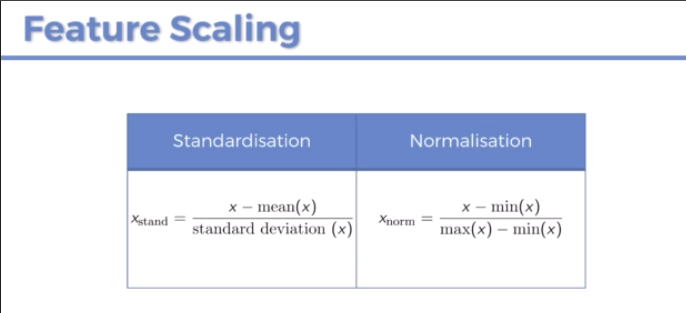

NORMALIZTION is recommended when you have normal distribution on all your features

STANDARDIZATION works fine all the time

therefore it is better to go for standardization as it will do a better feature scaling and improve the training process

CAUTION: The mean is the mean of xtrain only. xtest must be regarded as complete set of new data inorder to test the model.

DO WE HAVE TO APPLY FEATURE SCALING (ie STANDARDIZATION) TO THE DUMMY VARIABLES?

NO. THE GOAL OF STANDARDIZATION IS TO HAVE ALL THE FEATURES IN THE SAME RANGE.You will lose the information of which country corresponds to the observation.

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain[:,3:] = sc.fit_transform(Xtrain[:,3:])
Xtest[:,3:] = sc.transform(Xtest[:,3:])

print(Xtrain)
print(Xtest)


[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]
[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]
